In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [4]:
df=datasets.load_boston()

In [6]:
df.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [11]:
df.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [19]:
pd.DataFrame(df.data,columns=df.feature_names).head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [24]:
pd.DataFrame(df.target).head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [33]:
df_1=pd.DataFrame(np.c_[df.data,df.target],columns=[list(df.feature_names)+['Target']])
df_1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [35]:
df_1.drop(['CRIM','ZN','INDUS','CHAS','NOX','RM','DIS','RAD','PTRATIO','B','LSTAT'],axis=1,inplace=True)

C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [59]:
df_1

,AGE,TAX,Target
0,65.2,296.0,24.0
1,78.9,242.0,21.6
2,61.1,242.0,34.7
3,45.8,222.0,33.4
4,54.2,222.0,36.2
...,...,...,...
501,69.1,273.0,22.4
502,76.7,273.0,20.6
503,91.0,273.0,23.9
504,89.3,273.0,22.0


In [40]:
x=df_1.iloc[:,:-1]
y=df_1.iloc[:,-1]

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [48]:
from sklearn.tree import DecisionTreeRegressor
reg=DecisionTreeRegressor()
reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [56]:
y_pred=reg.predict(x_test)
pd.DataFrame(y_pred,columns=['y_pred'])

,y_pred
0,19.300000
1,13.947059
2,23.900000
3,12.500000
4,21.800000
...,...
147,46.000000
148,6.300000
149,13.000000
150,21.600000


In [52]:
from sklearn import metrics

In [53]:
print(metrics.mean_absolute_error(y_test,y_pred))

6.9070175438596495


In [54]:
print(metrics.mean_squared_error(y_test,y_pred))

101.3772738339505


In [61]:
y.mean()

22.532806324110698

In [62]:
p=10/100*22.53
p

2.253

In [64]:
import matplotlib.pyplot as plt

[Text(490.04158665314884, 530.01, 'X[1] <= 420.5\nmse = 84.765\nsamples = 354\nvalue = 22.745'),
 Text(283.2886599475191, 502.83000000000004, 'X[1] <= 267.5\nmse = 72.827\nsamples = 240\nvalue = 25.675'),
 Text(122.27547709923664, 475.65000000000003, 'X[1] <= 249.5\nmse = 91.238\nsamples = 77\nvalue = 30.244'),
 Text(66.9280534351145, 448.47, 'X[1] <= 222.5\nmse = 83.963\nsamples = 56\nvalue = 27.991'),
 Text(25.237786259541984, 421.29, 'X[1] <= 190.5\nmse = 81.534\nsamples = 23\nvalue = 31.335'),
 Text(7.667175572519083, 394.11, 'X[1] <= 187.5\nmse = 18.068\nsamples = 7\nvalue = 21.043'),
 Text(5.111450381679389, 366.93000000000006, 'mse = 0.0\nsamples = 1\nvalue = 30.1'),
 Text(10.222900763358778, 366.93000000000006, 'X[0] <= 94.25\nmse = 5.129\nsamples = 6\nvalue = 19.533'),
 Text(5.111450381679389, 339.75, 'X[0] <= 76.9\nmse = 0.472\nsamples = 4\nvalue = 21.05'),
 Text(2.5557251908396945, 312.57000000000005, 'mse = 0.0\nsamples = 1\nvalue = 22.0'),
 Text(7.667175572519083, 312.5700

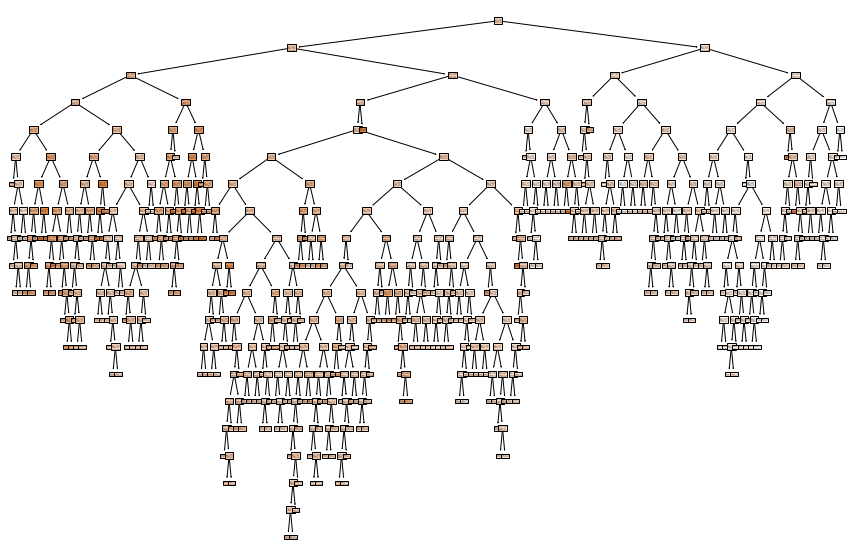

In [65]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(reg,filled=True)